# Task 1: Coding the Central Dogma

## 1.1 Write a function that finds the complementary sequence of a given DNA sequence

In [2]:
def dna_complementary(seq, direction = 'same'):
    comp_dict = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C'} #Creating a dictionary that maps A to T and C to G
    comp_seq = '' # Empty variable that will store the base pair complement of the input string.

    
    seq = seq.upper() # creating a variable of the input sequence where it is all uppercase. This handles the case- senstivie requirement.
    for base in seq:
        if base in comp_dict:
            comp_seq += comp_dict[base]
        else: 
            raise ValueError(f"'{seq}' is not a valid nucleotide sequence")
        

    if direction == 'reverse':
        comp_seq = comp_seq[::-1] # using [::-1] to reverse the complement sequence if reverse is specified.

    return comp_seq

# Testing function, 
dna_complementary('ATcG', 'same')

'TAGC'

## 1.2 Write a function that finds the RNA sequence of a given DNA sequence

In [3]:
def dna_rna(seq):
    
    seq = seq.upper() # handling lowercase letters
    
    if 'U' in seq: # checking if sequence is already a valid rna sequence
        print('Input sequence is already an RNA sequence')
     # checking to see if sequence contains non-canonical items   
    if any(base not in "ACGT" for base in seq):
        raise ValueError('input sequence contains non-canonical items')
    
     # if the input sequence passes both if statements then it will proceed.
    seq = seq.replace("T", "U")
    
    
    return(seq)


# Testing function
dna_rna('AACCGGG')

'AACCGGG'

## 1.3 Write a function that finds the amino acid sequence of a given RNA sequence

In [4]:
def rna_aa(seq):
    #Need to define a dictionary of triplet to amino acid mappings.
    seq= seq.upper()# handling lowercase
    # creating an amino acid sequence dictionary that maps RNA triplets to their respecting amino acid,
    # the stop codons are mapped to * as directed
    prot_seq = ""
    AA_dict = {
    "UUU": "F", "UUC": "F", "UUA": "L", "UUG": "L",
    "CUU": "L", "CUC": "L", "CUA": "L", "CUG": "L",
    "AUU": "I", "AUC": "I", "AUA": "I", "AUG": "M",
    "GUU": "V", "GUC": "V", "GUA": "V", "GUG": "V",
    "UCU": "S", "UCC": "S", "UCA": "S", "UCG": "S",
    "CCU": "P", "CCC": "P", "CCA": "P", "CCG": "P",
    "ACU": "T", "ACC": "T", "ACA": "T", "ACG": "T",
    "GCU": "A", "GCC": "A", "GCA": "A", "GCG": "A",
    "UAU": "Y", "UAC": "Y", "UAA": "*", "UAG": "*",
    "CAU": "H", "CAC": "H", "CAA": "Q", "CAG": "Q",
    "AAU": "N", "AAC": "N", "AAA": "K", "AAG": "K",
    "GAU": "D", "GAC": "D", "GAA": "E", "GAG": "E",
    "UGU": "C", "UGC": "C", "UGA": "*", "UGG": "W",
    "CGU": "R", "CGC": "R", "CGA": "R", "CGG": "R",
    "AGU": "S", "AGC": "S", "AGA": "R", "AGG": "R",
    "GGU": "G", "GGC": "G", "GGA": "G", "GGG": "G"
}

    for nt in range(0, len(seq), 3):
        codon = seq[nt:nt + 3] # codon variable that segments the sequence in 3
        if codon in AA_dict:
            AA = AA_dict[codon] 
            prot_seq += AA

    return(prot_seq)



# Testing Function
rna_aa("UGUGCUAUGUAAGUGAUAUGUAAUGCUAUUCGUGAG") # spent way too much time on this 

'CAM*VICNAIRE'

## 1.4 Tying it all together: Write a higher-order function that combines 1.1-1.3.

In [5]:


def dna_aa(seq, direction = 'same'):
    
    
    if direction == 'reverse': # will handle the direction and reverse parameter for dna_comp as mentioned in the project pdf notes.
    
        dna_comp = dna_complementary(seq, direction = 'reverse')
    else:
        dna_comp = dna_complementary(seq, direction = 'same')
   
    rna_seq = dna_rna(dna_comp) # calling on previous function
    
    aa = rna_aa(rna_seq) # calling on previous function
    
    return(aa)

dna_aa('CGTCGCTACaAACCg', direction = 'same')

'AAMFG'

## 1.5 Protein annotator

In [7]:
import minotaor
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

# Replace the sequence with your own sequence
protein = Seq("MHLEGRDGRRYPGAPAVELLQTSVPSGLAELVAGKRRLPRGAGGADPSHSCPRGAAGQSSWAPAGQEFASFLTKGRSHSSLPQMSSSRSKDSCFTENTPLLRNSLQEKGSRCIPVYHPEFITAEESWEDSSADWERRYLLSREVSGLSASASSEKGDLLDSPHIRLRLSKLRRCVQWLKVMGLFAFVVLCSILFSLYPDQGKLWQLLALSPLENYSVNLSSHVDSTLLQVDLAGALVASGPSRPGREEHIVVELTQADALGSRWRRPQQVTHNWTVYLNPRRSEHSVMSRTFEVLTRETVSISIRASLQQTQAVPLLMAHQYLRGSVETQVTIATAILAGVYALIIFEIVHRTLAAMLGSLAALAALAVIGDRPSLTHVVEWIDFETLALLFGMMILVAIFSETGFFDYCAVKAYRLSRGRVWAMIIMLCLIAAVLSAFLDNVTTMLLFTPVTIRLCEVLNLDPRQVLIAEVIFTNIGGAATAIGDPPNVIIVSNQELRKMGLDFAGFTAHMFIGICLVLLVCFPLLRLLYWNRKLYNKEPSEIVELKHEIHVWRLTAQRISPASREETAVRRLLLGKVLALEHLLARRLHTFHRQISQEDKNWETNIQELQKKHRISDGILLAKCLTVLGFVIFMFFLNSFVPGIHLDLGWIAILGAIWLLILADIHDFEIILHRVEWATLLFFAALFVLMEALAHLHLIEYVGEQTALLIKMVPEEQRLIAAIVLVVWVSALASSLIDNIPFTATMIPVLLNLSHDPEVGLPAPPLMYALAFGACLGGNGTLIGASANVVCAGIAEQHGYGFSFMEFFRLGFPMMVVSCTVGMCYLLVAHVVVGWN")
protein_record = SeqRecord(protein, id="sp|Q04671|", annotations={"molecule_type": "protein"})

protein_record = minotaor.annotate_record(protein_record)  # search is case sensitive

ModuleNotFoundError: No module named 'minotaor'

In [6]:
protein_record

SeqRecord(seq=Seq('MHLEGRDGRRYPGAPAVELLQTSVPSGLAELVAGKRRLPRGAGGADPSHSCPRG...GWN'), id='sp|Q04671|', name='<unknown name>', description='<unknown description>', dbxrefs=[])

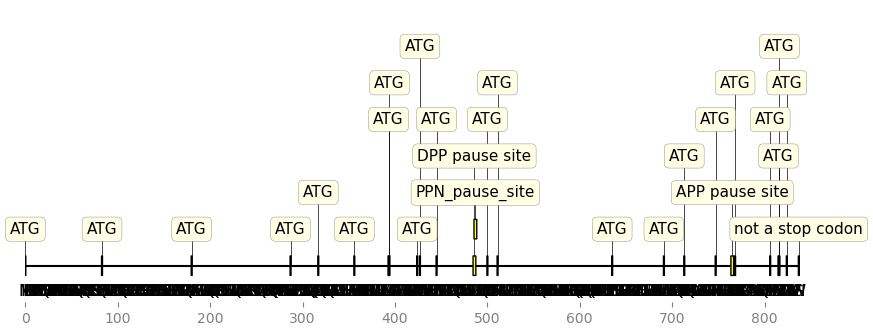

In [7]:
graphic_record = minotaor.MinotaorTranslator().translate_record(protein_record)
ax, _ = graphic_record.plot(figure_width=10, strand_in_label_threshold=7)
graphic_record.plot_sequence(ax)

The protein seqeunce that I chose was the protein sequence thats comes from the OCA2 gene. The protein sequence was acquired though uniProt. The common name of this protein is P-protein and is found in the human genome. To put it simply, its primary function is to provide optimal melanosomal pH for tyrosinase activity that is required for melanogenesis. So basically it regulates skin pigmenation. Any variants of the protein will cause skin disorders like albinism.

# Task 2: Wrapping it all together with raw data

2.1 Write a function that reads the fastq file and extracts all sequences that have a quality scores above Q10.

In [8]:
# Importing Packages, parsing fastq files useing SeqIO
from Bio import SeqIO


def extract_seqs(file_path): # changed to have one more param because I learned this in R studio
    
    seq_dict = {}
    
    with open(file_path, "r") as fastq_file:  #opening the fastq file
        for record in SeqIO.parse(fastq_file, "fastq"): # using the seqIO parse, 
            
            if min(record.letter_annotations["phred_quality"]) >= 10: # Filters the file to only add seqeunces that have a quality score that is equal to 10 or grerater.
                
            
                seq_dict[record.id]= str(record.seq) # putting everything in a dictionary
 
    return(seq_dict)


    
    
head(extract_seqs('sample10000.fastq'))


ModuleNotFoundError: No module named 'Bio'

In [9]:
class Genome:
    """
    Read, store, and analyze the contents of a genome from a FASTA file
    """
    def __init__(self, filepath):
        self.filepath = filepath
        self.dna_seqs = None
        self.dna_complementary_seqs = None
        self.rna_sequences = None
        self.aa_sequences = None
    
    # UPDATE THE FOLLOWING FUNCTIONS TO POPULATE THE ABOVE PROPERTIES
    def extract_seqs(self):
        dna_seq = {} # empty dictionary
    
        with open(self.filepath, "r") as fastq_file:  #opening the fastq file
            for record in SeqIO.parse(fastq_file, "fastq"): # using the seqIO parse, 
            
                if min(record.letter_annotations["phred_quality"]) >= 10: # Filters the file to only add seqeunces that have a quality score that is equal to 10 or grerater
                    dna_seq[record.id]= str(record.seq) # storing the info in a dictionary
        
        self.dna_seqs = dna_seq # making the self.dna_seqs equal to dna_seq 

    
    
    def complementary_seqs(self): # having the direction was not specified in the report so I omitted this to reduce bloat
        comp_dict = {'A': 'T', 'T': 'A', 'C': 'G', 'G': 'C'}
        dna_complementary_seqs = {}  # Initialize the dictionary for complementary sequences

        if self.dna_seqs == "None":
            
            raise ValueError(f"'{dna_seq} is empty") # error handling
        
        
        
        for seq_id, seq in self.dna_seqs.items(): # for loop that calls on the dna_seq dicitonary
            seq = seq.upper() # handling lowercase (not sure if its needed but its here anways)
            comp_seq = ''

            for base in seq:
                if base in comp_dict:
                    comp_seq += comp_dict[base]
                else:
                    raise ValueError(f"'{seq}' is not a valid input")

            dna_complementary_seqs[seq_id] = comp_seq
            
        self.dna_complementary_seqs = dna_complementary_seqs
 
    def rna_seqs(self):
        rna_seqs = {}

        if self.dna_complementary_seqs == "None":  # error handling
            raise ValueError ("Instance Variable 'self.dna_complementary_seqs' is empty")
        
        
        for seq_id, seq in self.dna_complementary_seqs.items(): # for loop that iterates through the dictionary also using the .items

            if 'U' in seq: # Error Handling
                print(f'{seq_id}: Input sequence is already an RNA sequence')
            
            elif any(base not in "ACGT" for base in seq): # more error handling
                raise ValueError(f'{seq_id}: Input sequence contains non-canonical items')

            seq = seq.replace("T", "U")

            rna_seqs[seq_id] = seq # remapping the seq ids to the sequences

        self.rna_sequences = rna_seqs  # instance variable equal to function output {dict} 
    
   
    
    def aa_seqs(self):
        aa_seqs = {} # Init function variable

            # Define the RNA to amino acid mapping dictionary
        rna_codon_table = {
        "UUU": "F", "UUC": "F", "UUA": "L", "UUG": "L",
        "CUU": "L", "CUC": "L", "CUA": "L", "CUG": "L",
        "AUU": "I", "AUC": "I", "AUA": "I", "AUG": "M",
        "GUU": "V", "GUC": "V", "GUA": "V", "GUG": "V",
        "UCU": "S", "UCC": "S", "UCA": "S", "UCG": "S",
        "CCU": "P", "CCC": "P", "CCA": "P", "CCG": "P",
        "ACU": "T", "ACC": "T", "ACA": "T", "ACG": "T",
        "GCU": "A", "GCC": "A", "GCA": "A", "GCG": "A",
        "UAU": "Y", "UAC": "Y", "UAA": "*", "UAG": "*",
        "CAU": "H", "CAC": "H", "CAA": "Q", "CAG": "Q",
        "AAU": "N", "AAC": "N", "AAA": "K", "AAG": "K",
        "GAU": "D", "GAC": "D", "GAA": "E", "GAG": "E",
        "UGU": "C", "UGC": "C", "UGA": "*", "UGG": "W",
        "CGU": "R", "CGC": "R", "CGA": "R", "CGG": "R",
        "AGU": "S", "AGC": "S", "AGA": "R", "AGG": "R",
        "GGU": "G", "GGC": "G", "GGA": "G", "GGG": "G"
            }
        if self.rna_sequences == "None": # Error Handling
            raise ValueError("self.rna_sequences instance variable is empty")
            
        # Iterate over the RNA sequences and translate them to amino acids
        for seq_id, seq in self.rna_sequences.items(): # modifying the previous code in part 1 to handle dictionary inputs
            prot_seq = ""
            seq = seq.upper()  # Convert to uppercase for consistency

            for nt in range(0, len(seq), 3):
                codon = seq[nt:nt + 3]  # Codon variable that segments the sequence in 3
                if codon in rna_codon_table:
                    AA = rna_codon_table[codon]
                    prot_seq += AA

            aa_seqs[seq_id] = prot_seq

        # Setting instance variable to the function variable
        self.aa_sequences = aa_seqs


    def annot_aa_plot(self, seqid):
        if self.aa_sequences == "None":
            raise ValueError("self.aa_sequences instance variable is empty")
        #Throwing in an if statement to check if the seqid param is found inside the aa_sequences dictionary
        if seqid in self.aa_sequences:
            #The Rest of this code is almost exactly like the code given but modified to incorperate self.aa_seqeunces and the seqid parameter.
            protein_sequence = self.aa_sequences[seqid]
            protein_record = SeqRecord(Seq(protein_sequence), id = seqid, annotations= {"molecule type" : "protein"})
            protein_record = minotaor.annotate_record(protein_record)  # search is case sensitive
            graphic_record = minotaor.MinotaorTranslator().translate_record(protein_record)
            ax, _ = graphic_record.plot(figure_width=10, strand_in_label_threshold=7)
            graphic_record.plot_sequence(ax)
            # honestly I could tweak this to make it not look like crap but it works so eh

            
            
#Testing everything to make sure it looks good.            
g = Genome('sample10000.fastq')
g.extract_seqs()
#(g.dna_seqs) Commented out because pdf looks terrible with it


In [10]:
#Testing if the Class is working properly
g.complementary_seqs()
#print(g.dna_complementary_seqs)


In [11]:
#Testing if the Class is working properly
g.rna_seqs()
#print(g.rna_sequences)

In [12]:
#Testing if the Class is working properly
g.aa_seqs()
#print(g.aa_sequences)

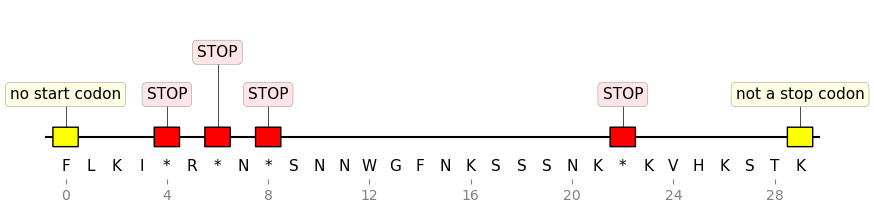

In [13]:
g.annot_aa_plot('ERR016162.31734339') # Testing out the function for protein annotatation, looks good enough to me! 